#### Importing libraries 

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE

from sklearn.decomposition import PCA

from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn import svm

#### loading the csv

In [2]:
df_train = pd.read_csv('train(1).csv')

In [79]:
df_train.shape

(533000, 27)

In [4]:
df_train.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [5]:
df_train.head(2)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [7]:
df_train.nunique()

id                595212
target                 2
ps_ind_01              8
ps_ind_02_cat          5
ps_ind_03             12
ps_ind_04_cat          3
ps_ind_05_cat          8
ps_ind_06_bin          2
ps_ind_07_bin          2
ps_ind_08_bin          2
ps_ind_09_bin          2
ps_ind_10_bin          2
ps_ind_11_bin          2
ps_ind_12_bin          2
ps_ind_13_bin          2
ps_ind_14              5
ps_ind_15             14
ps_ind_16_bin          2
ps_ind_17_bin          2
ps_ind_18_bin          2
ps_reg_01             10
ps_reg_02             19
ps_reg_03           5013
ps_car_01_cat         13
ps_car_02_cat          2
ps_car_03_cat          3
ps_car_04_cat         10
ps_car_05_cat          3
ps_car_06_cat         18
ps_car_07_cat          3
ps_car_08_cat          2
ps_car_09_cat          6
ps_car_10_cat          3
ps_car_11_cat        104
ps_car_11              5
ps_car_12            184
ps_car_13          70482
ps_car_14            850
ps_car_15             15
ps_calc_01            10


0    514957
1     18043
Name: target, dtype: int64


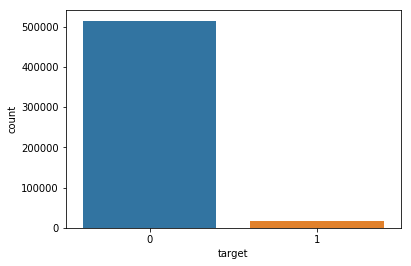

In [97]:
print(df_train.target.value_counts())
sns.countplot(df_train.target)

In [9]:
# This function gives the number of outliers in the columns and also returns the columns with outliers

def get_outlier(df):
    features = df.columns
    outliers  = []
    for i, feature in enumerate(features):
        if df[feature].dtype == 'float64':
            # Calculate Q1 (25th percentile of the data) for the given feature
            Q1 = np.percentile(df[feature], 25)
            # Calculate Q3 (75th percentile of the data) for the given feature
            Q3 = np.percentile(df[feature], 75)
            # Use the interquartile range to calculate an outlier step
            step = 1.5 * (Q3 - Q1)
            feature_outliers = df[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step))]
            outliers.extend(list(feature_outliers.index.values))
            print('Feature Name: {}, No. of outliers: {}\n'.format(feature, len(feature_outliers.index)))
    
    multi_feature_outliers = (Counter(outliers) - Counter(set(outliers))).keys()
    return multi_feature_outliers

In [10]:
corr = df_train.corr()

In [11]:
corr

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,1.000000,-0.000188,0.000826,0.001646,-0.001307,0.000168,0.000022,-0.000093,0.002473,-0.000479,...,-0.001249,-0.001093,-0.000157,0.001609,-0.001227,-0.001412,-0.001267,-0.001387,0.000194,-0.001267
target,-0.000188,1.000000,0.018570,0.004534,0.008360,0.009360,0.029165,-0.034017,0.034218,0.013147,...,0.000371,-0.001133,-0.000446,0.001362,-0.000490,0.000624,-0.000170,0.000552,-0.001744,-0.001072
ps_ind_01,0.000826,0.018570,1.000000,-0.001793,0.223408,0.066645,0.014823,-0.277458,0.005700,0.188583,...,-0.001263,0.001521,0.000199,-0.000891,-0.000397,-0.000012,-0.000868,-0.001504,-0.000162,-0.001464
ps_ind_02_cat,0.001646,0.004534,-0.001793,1.000000,-0.061189,0.147110,-0.014860,-0.125653,0.016398,0.030945,...,0.000038,-0.000884,-0.000893,-0.000519,-0.000109,0.000920,0.000547,0.000824,0.000367,-0.002070
ps_ind_03,-0.001307,0.008360,0.223408,-0.061189,1.000000,-0.095856,0.053250,-0.045158,-0.060368,0.014037,...,-0.002716,-0.002352,0.000133,0.000205,0.000134,-0.000744,0.000158,-0.000218,-0.000882,-0.003709
ps_ind_04_cat,0.000168,0.009360,0.066645,0.147110,-0.095856,1.000000,0.013053,-0.297737,0.304949,0.044978,...,-0.002001,-0.000814,0.000283,0.001565,0.002735,0.002295,0.000773,0.000916,-0.001966,0.001244
ps_ind_05_cat,0.000022,0.029165,0.014823,-0.014860,0.053250,0.013053,1.000000,0.009619,-0.010382,0.004881,...,-0.001525,0.000975,0.001549,0.002171,0.001548,-0.000368,0.000153,0.000032,0.000276,0.000279
ps_ind_06_bin,-0.000093,-0.034017,-0.277458,-0.125653,-0.045158,-0.297737,0.009619,1.000000,-0.474009,-0.356838,...,0.000822,0.001347,-0.001301,0.000304,0.002088,-0.000381,-0.000001,-0.000759,0.002791,0.000203
ps_ind_07_bin,0.002473,0.034218,0.005700,0.016398,-0.060368,0.304949,-0.010382,-0.474009,1.000000,-0.260438,...,-0.000448,-0.001044,0.000541,0.001666,0.000575,0.001220,-0.000517,0.000181,-0.001361,-0.000961
ps_ind_08_bin,-0.000479,0.013147,0.188583,0.030945,0.014037,0.044978,0.004881,-0.356838,-0.260438,1.000000,...,-0.000632,-0.001241,-0.000432,-0.001959,-0.002782,-0.002048,-0.000579,-0.000068,-0.000919,0.000995


In [12]:
df_train = df_train.replace(-1, np.nan)

In [13]:
train_missing = df_train.isnull().sum().sort_values(ascending=False)
train_missing = pd.DataFrame(train_missing).reset_index()
train_missing.columns = ['Feature', 'Number of Data Records Missing']
train_missing.head()

,Feature,Number of Data Records Missing
0,ps_car_03_cat,411231
1,ps_car_05_cat,266551
2,ps_reg_03,107772
3,ps_car_14,42620
4,ps_car_07_cat,11489


In [14]:
train_missing[train_missing['Number of Data Records Missing'] > 0].shape

(12, 2)

In [15]:
df_train.isnull().sum() > 0 

id                False
target            False
ps_ind_01         False
ps_ind_02_cat      True
ps_ind_03         False
ps_ind_04_cat      True
ps_ind_05_cat      True
ps_ind_06_bin     False
ps_ind_07_bin     False
ps_ind_08_bin     False
ps_ind_09_bin     False
ps_ind_10_bin     False
ps_ind_11_bin     False
ps_ind_12_bin     False
ps_ind_13_bin     False
ps_ind_14         False
ps_ind_15         False
ps_ind_16_bin     False
ps_ind_17_bin     False
ps_ind_18_bin     False
ps_reg_01         False
ps_reg_02         False
ps_reg_03          True
ps_car_01_cat      True
ps_car_02_cat     False
ps_car_03_cat      True
ps_car_04_cat     False
ps_car_05_cat      True
ps_car_06_cat     False
ps_car_07_cat      True
ps_car_08_cat     False
ps_car_09_cat      True
ps_car_10_cat     False
ps_car_11_cat     False
ps_car_11          True
ps_car_12          True
ps_car_13         False
ps_car_14          True
ps_car_15         False
ps_calc_01        False
ps_calc_02        False
ps_calc_03      

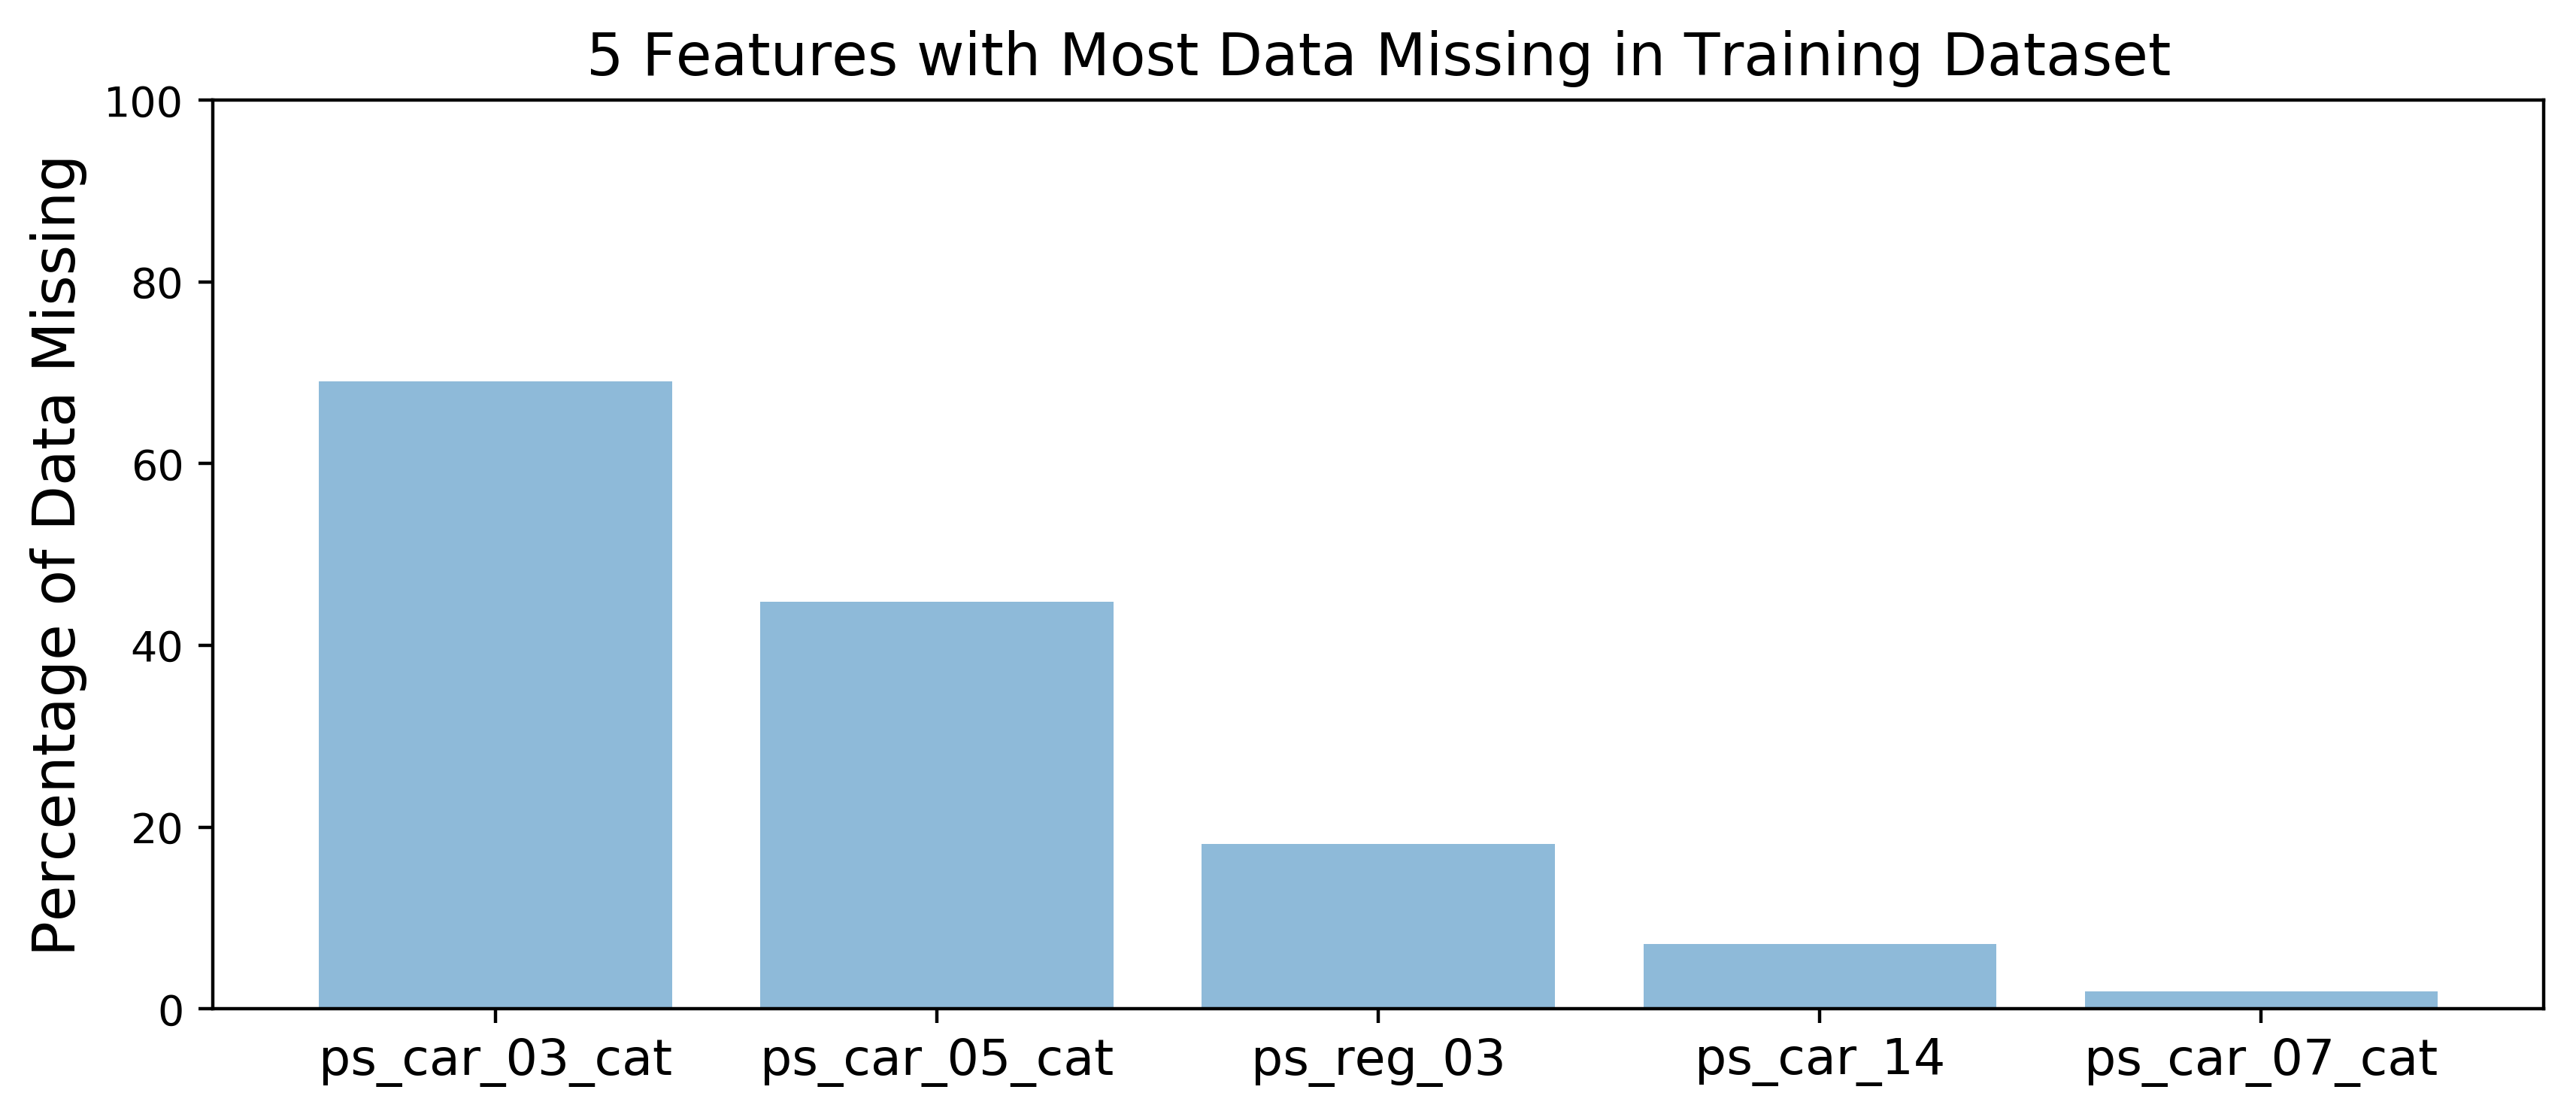

In [16]:
# Visualize the percentage of data missing
train_missingpercent = 100 * (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)

plt.figure(figsize = (10, 4), dpi = 400)
plt.bar(np.arange(5), train_missingpercent[:5], align='center', alpha=0.5)
plt.xticks(np.arange(5), train_missingpercent.index[:5], fontsize=12)
plt.ylim(0, 100)
plt.ylabel('Percentage of Data Missing', fontsize = 14)
plt.title('5 Features with Most Data Missing in Training Dataset', fontsize = 14) 
plt.savefig('five_features.jpg')
plt.show()

### Drop Redundant Features & Replace Missing Data
#### Features 'ps_car_03_cat' and 'ps_car_05_cat' have more than 40% data missing, drop them.
#### Analyze the correlations of all remaining features, drop redundant features
#### Replace missing data in remaining features

In [17]:
# drop features 'ps_car_03_cat' and 'ps_car_05_cat'
df_train = df_train.drop(['ps_car_03_cat', 'ps_car_05_cat'], axis = 1)
#test = test.drop(['ps_car_03_cat', 'ps_car_05_cat'], axis = 1)

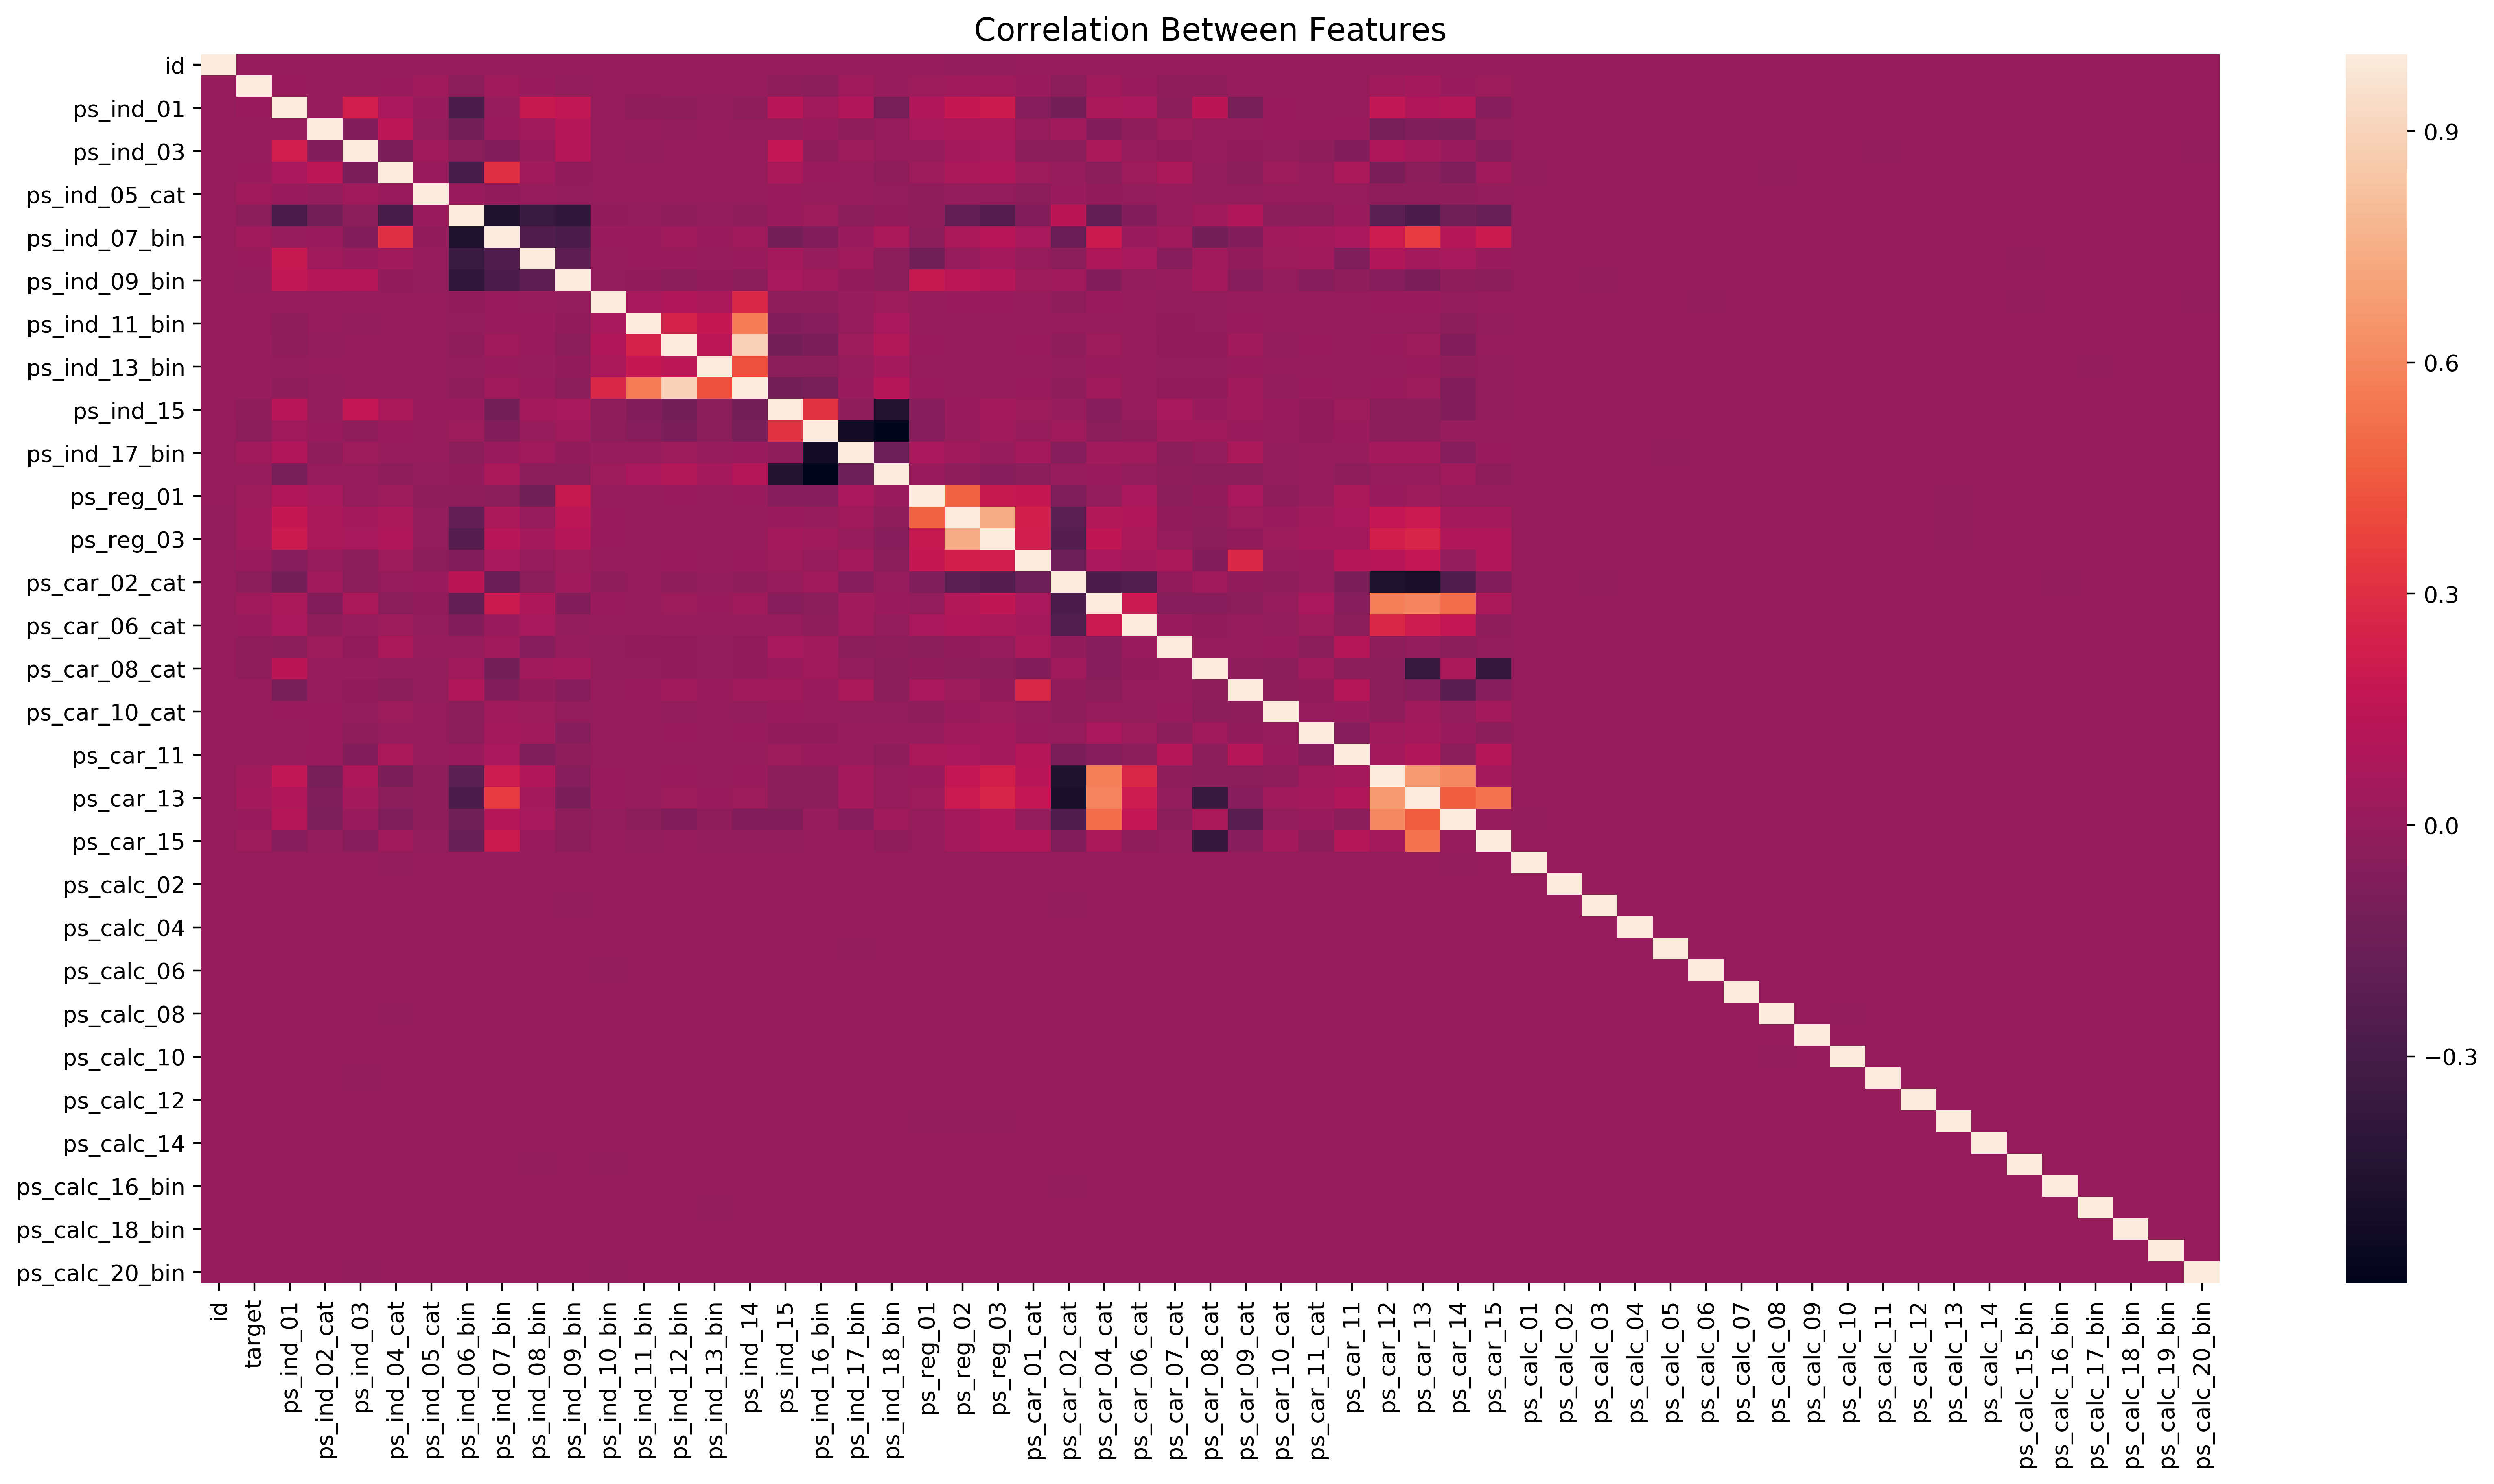

In [18]:
# visualize the correlation between remaining features
corr = df_train.corr()

plt.figure(figsize = (20,10), dpi= 400)
sns.heatmap(corr)
plt.title("Correlation Between Features", fontsize = 14)
plt.xticks(rotation = 'vertical')
plt.savefig('correlation.jpg')
plt.show()

Features with calc in their names show little correlation with any other features in the training dataset. For dimensionality reduction, we should drop these features also.

In [19]:
# drop features with '_calc_' in feature names
feature_calc = list(df_train.columns[df_train.columns.str.contains('_calc_')])
print('Dropped calc columns--->', feature_calc)
df_train = df_train.drop(feature_calc, axis = 1)
#test = test.drop(feature_calc, axis = 1)

print(df_train.shape)
#print(test.shape)

Dropped calc columns---> ['ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']
(595212, 37)


Now replace the missing data in the remaining features:

For binary features (bin) and categorical features (cat), replace missing data with the most frequent value of the feature
For other features (continuous or ordinal), replace missing data with mean value of the feature

In [20]:
# replace missing data in the remaining features
feature_bin = [f for f in df_train.columns if f.endswith('bin')] 
feature_cat = [f for f in df_train.columns if f.endswith('cat')] 
feature_els = [f for f in df_train.columns if (f not in feature_bin) & (f not in feature_cat) & (f not in ['id', 'target'])]

for f in (feature_bin + feature_cat):
    df_train[f].fillna(value=df_train[f].mode()[0], inplace=True)
    #test[f].fillna(value=test[f].mode()[0], inplace=True)
    
for f in feature_els:
    df_train[f].fillna(value=df_train[f].mean(), inplace=True)
    #test[f].fillna(value=test[f].mean(), inplace=True)

In [21]:
# PS_ind_06_bin and PS_ind_07_bin high correlation - so we drop PS_ind_06_bin
# ps_ind_16_bin corr with ps_ind_17_bin and ps_ind_18_bin so we drop ps_ind_16_bin
df_train = df_train.drop(["ps_ind_06_bin", "ps_ind_16_bin"], axis = 1)

In [22]:
#Droping variable 'ps_car_15' as it is highly correlated with the variable 'ps_car_13' and checking the shape of resulting dataframe

df_train = df_train.drop(["ps_car_15"], axis = 1)

Now let's look at these features' data distribution:

In [23]:
print(len(df_train.columns))
print(df_train.columns)

34
Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_17_bin',
       'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat',
       'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat',
       'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14'],
      dtype='object')


In [24]:
outliers  = get_outlier(df_train.drop(['id', 'target'], axis = 1))

Feature Name: ps_ind_02_cat, No. of outliers: 11378

Feature Name: ps_ind_04_cat, No. of outliers: 0

Feature Name: ps_ind_05_cat, No. of outliers: 61394

Feature Name: ps_reg_01, No. of outliers: 0

Feature Name: ps_reg_02, No. of outliers: 36793

Feature Name: ps_reg_03, No. of outliers: 35514

Feature Name: ps_car_01_cat, No. of outliers: 5904

Feature Name: ps_car_07_cat, No. of outliers: 30575

Feature Name: ps_car_09_cat, No. of outliers: 0

Feature Name: ps_car_11, No. of outliers: 25983

Feature Name: ps_car_12, No. of outliers: 15355

Feature Name: ps_car_13, No. of outliers: 26913

Feature Name: ps_car_14, No. of outliers: 30420



In [25]:
#Removing outliers from the dataframe

print('Shape of old data: {}'.format(df_train.shape))
df_train = df_train.drop(df_train.index[list(outliers)]).reset_index(drop = True)

print('Number of outliers in more than one feature: {}'.format(len(outliers)))
print('Shape of new data: {}'.format(df_train.shape))

Shape of old data: (595212, 34)
Number of outliers in more than one feature: 62212
Shape of new data: (533000, 34)


In [26]:
feature_bin = [f for f in df_train.columns if f.endswith('bin')] 
feature_cat = [f for f in df_train.columns if f.endswith('cat')] 

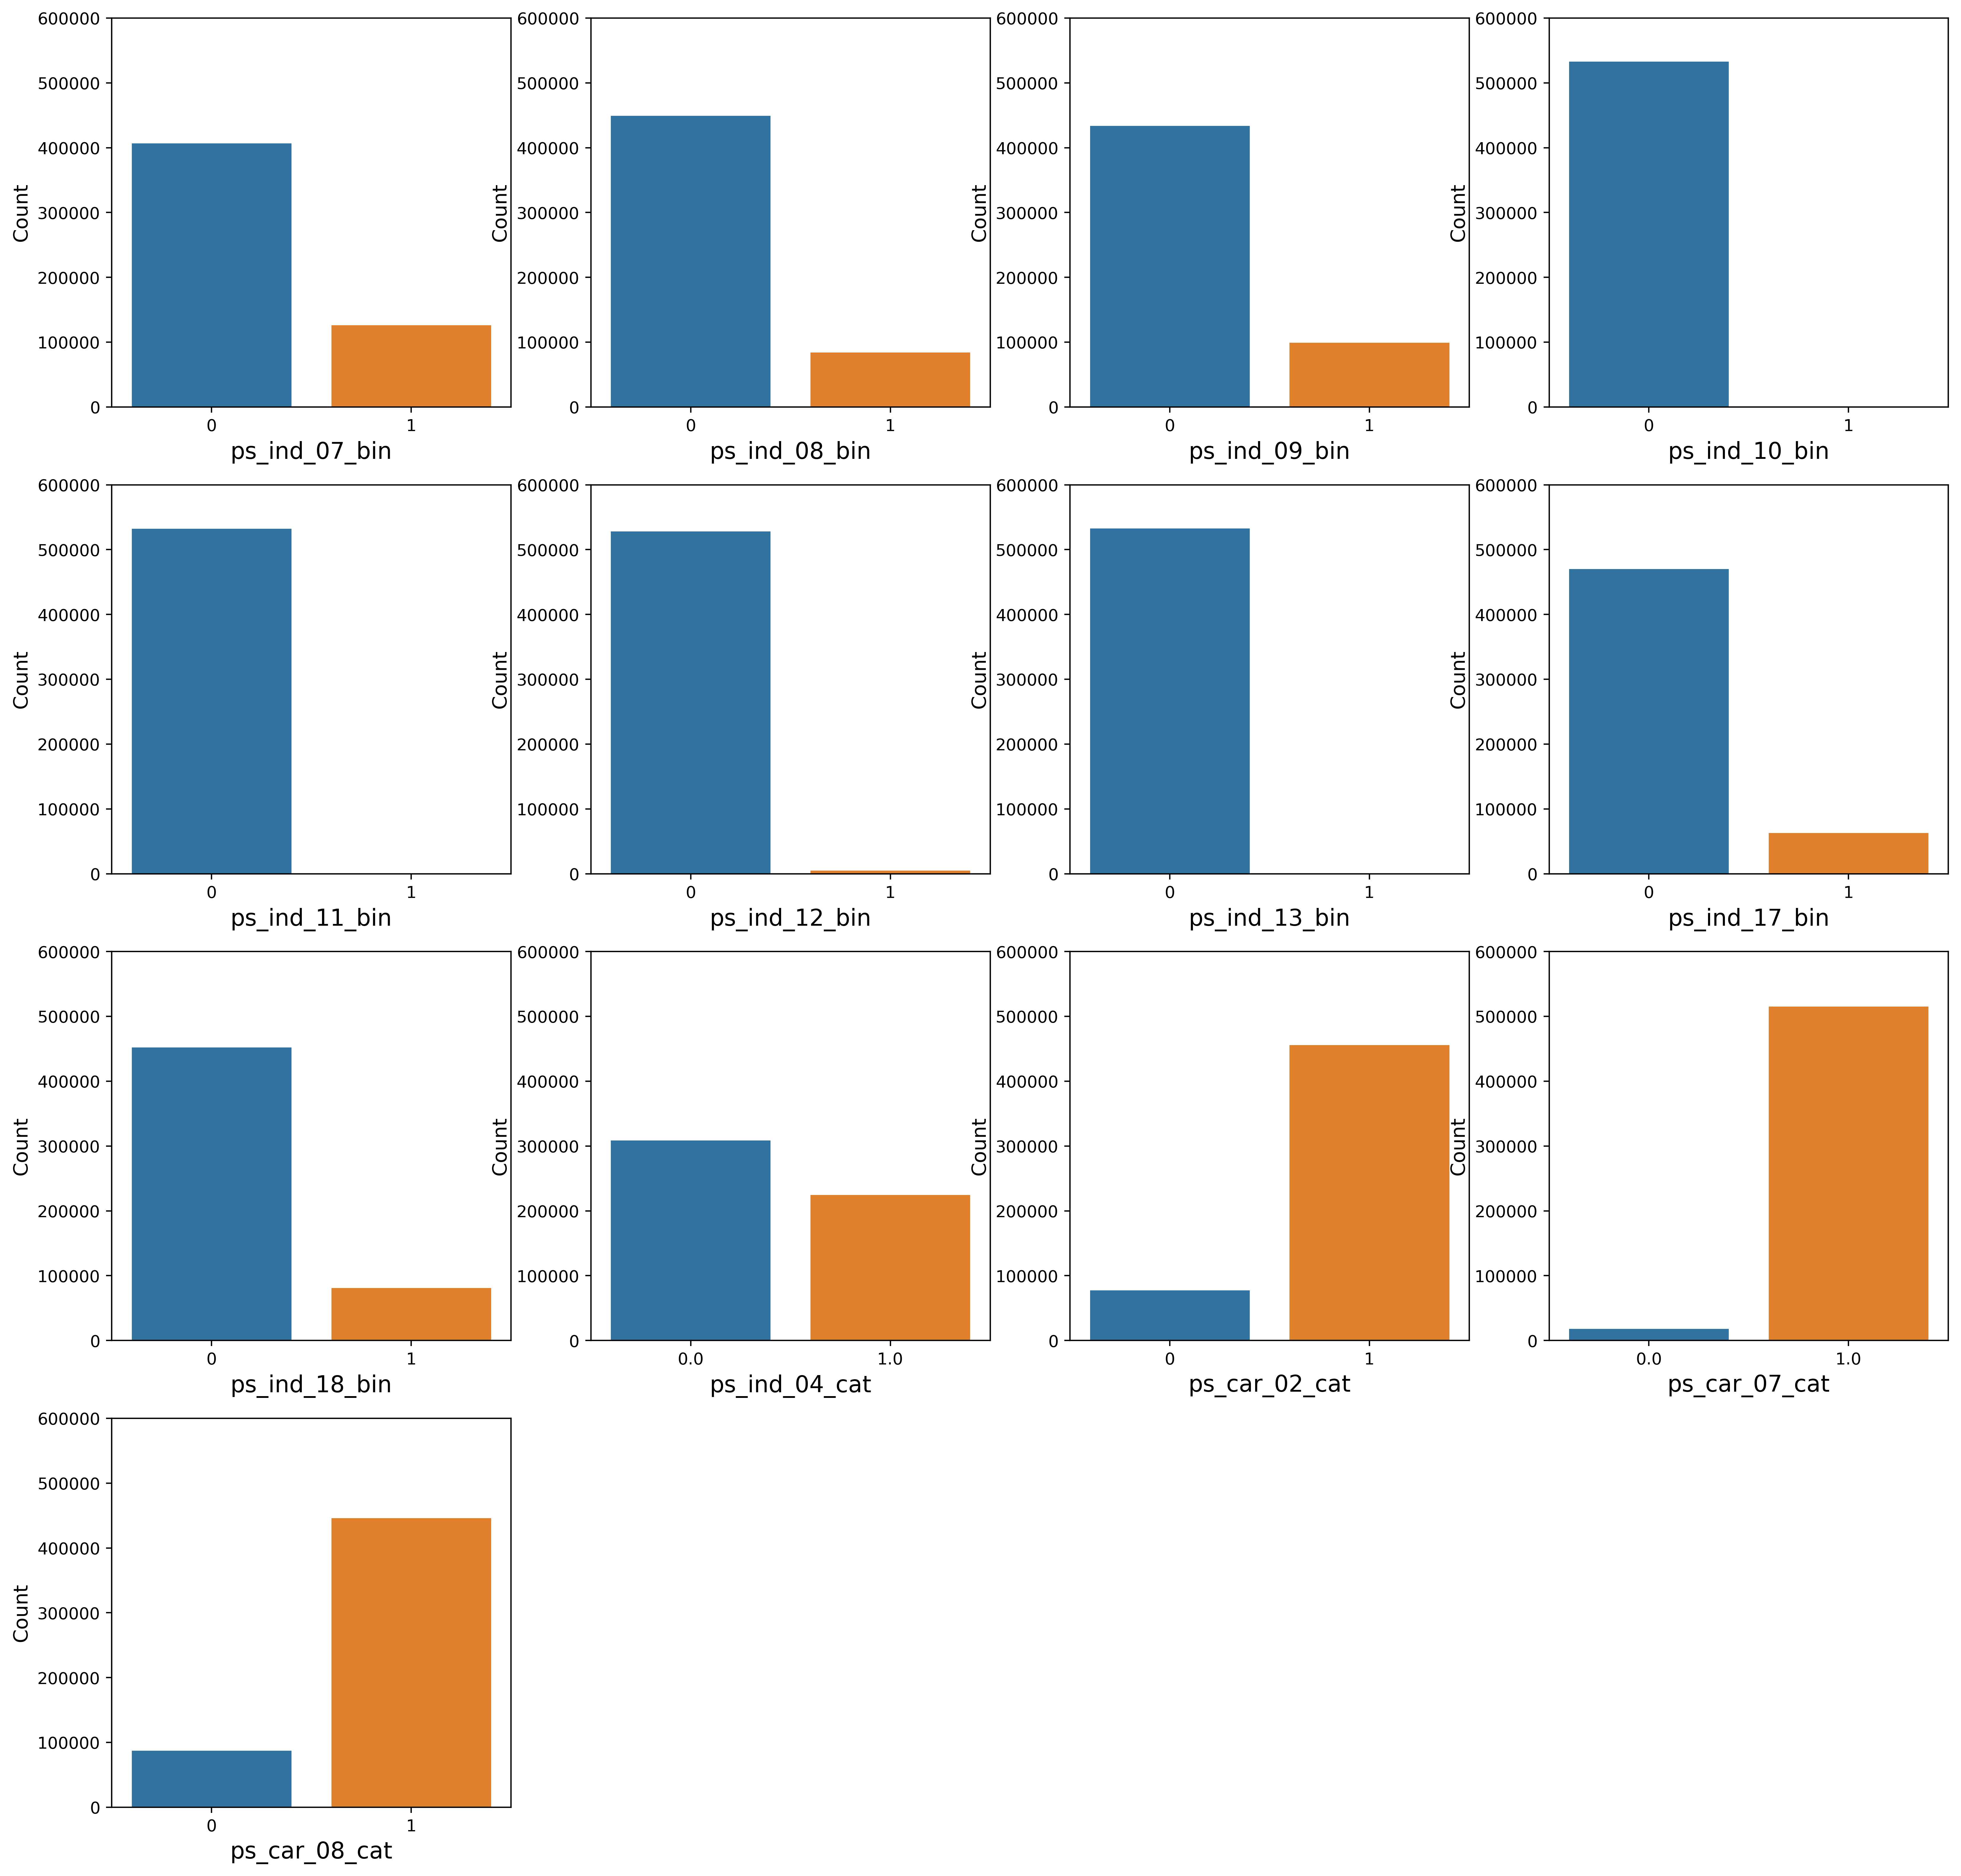

In [27]:
# Visualize binary features data and categorical features data (for styling, plot only features with 2 unique values)
plt.figure(figsize=(20, 20), dpi = 400)
count = 0

for f in (feature_bin + feature_cat):
    if  df_train[f].nunique() <= 2:
        ax = plt.subplot(4, 4, count+1)
        sns.countplot(df_train[f])
        plt.xlabel(f, fontsize = 14)
        plt.ylabel("Count", fontsize = 12)
        plt.ylim(0, 600000)
        count += 1
        
plt.savefig('distribution.jpg')
plt.show()

### Exploratory Data Analysis

### 1.	Write at least 3 important inferences from the data above 

•	Target is imbalanced

•	4 types of columns (Category, Binary, Ordinal, Interval)

•	Outliers - There are few outliers in the data, removed those to have better predictions

•	Null values - Many features have null values in form of -1 so replaced with suitable values (Mode/Mean)

•	6 variables have too low variance.

- There are 57 distinct features (apart from id and target columns).This is a very reasonable amount of features considering the size of dataset. We may hardly face the curse of dimensionality.
- There 32 Categorical features out of which there are 17 Binary features.

- Analyzed the correlations of all remaining features, drop redundant features.
- There are 12 features which are having missing values in dataset.
- There are few missing values in some features, but Features <b>'ps_car_03_cat'</b> and <b>'ps_car_05_cat'</b> have more than 40% data missing, so we have dropped them.
- Replaced the missing data in the remaining features:
- For binary features (bin) and categorical features (cat), replace missing data with the <b>most frequent value (Mode)</b> of the feature For other features (continuous or ordinal), replace missing data with <b>mean</b> value of the feature
- Features with <b>calc</b> in their names show little correlation with any other features in the training dataset. For dimensionality reduction, we should drop these features also.

- Now I will covert categorical features to dummy variables (one-hot encoding). One thing to note is that feature 'ps_car_11_cat' has 104 unique values.

- Target feature is not balanced class 0 is only 3.64% of total value.
- Mostly we prefer upsampling/downsampling in case of class imbalance.

### Data Preparation
#### Before applying machine learning algorithms, I should conduct feature standardization (z-score normalization).

In [28]:
#Removing low variance variables from the dataframe

#Checking the number of low variance variables in the data using VarianceThreshold from sklearn feature_selection 


selector = VarianceThreshold(threshold=.01)
selector.fit(df_train.drop(['id', 'target'], axis=1)) # Fit to train without id and target variables

f = np.vectorize(lambda x : not x) # Function to toggle boolean array elements

v = df_train.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(v)))
print('\nThese variables are {}'.format(list(v)))

7 variables have too low variance.

These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_10_cat', 'ps_car_12', 'ps_car_14']


In [29]:
#Dropping the low variance variables from the data and checking the shape of the final dataframe

print('\nShape of df before removal of low variance rows: ',df_train.shape)

df_train = df_train.drop(list(v), axis = 1)

print('Shape of df after removal of low variance rows: ',df_train.shape)


Shape of df before removal of low variance rows:  (533000, 34)
Shape of df after removal of low variance rows:  (533000, 27)


In [30]:
# standardization of non categorical features
feature_non_cat = [f for f in df_train.columns if (f.endswith('cat') != True) & (f not in ['id', 'target'])]
scaler = StandardScaler()

train_X = df_train.drop(['target', 'id'], axis=1)
train_y = df_train['target']
#X_valid = test.drop('id', axis=1)

train_X.loc[:, feature_non_cat] = scaler.fit_transform(train_X[feature_non_cat])
#X_valid.loc[:, feature_non_cat] = scaler.transform(X_valid[feature_non_cat])

Now I will covert categorical features to dummy variables (one-hot encoding). One thing to note is that feature 'ps_car_11_cat' has 104 unique values.

In [31]:
print(df_train['ps_car_11_cat'].unique())

[ 12  19  60 104  82  99  30  68  20  36 101 103  59  43  64  29  95   5
  28  87  66  10  26  54  32  38  83  89  49  93   1  22  85  78  31  34
   7   8   3  46  27  25  61  16  69  40  76  39  88  75  91  23  80  92
  72  86  90  62  33  67  73  77  42  21  74  37  44  48  70  13  15 102
  53  65 100  51  79  52  63   6  57  98  56  71  94  97  55  84  50   9
  17  41  11  45  14  96  24   2  18  35  81  47   4  58]


Because of the amount of categorical feature 'ps_car_11_cat' and other features have, the next step (coverting to dummy variables) will use about 2.2 GB memory and produce sparse matrix. Although executing the next cell is not very time-consuming, sometimes I run out of memory if I have many other applications running on my computer.

In [32]:
feature_bin = [f for f in df_train.columns if f.endswith('bin')] 
feature_cat1 = [f for f in df_train.columns if f.endswith('cat') and f!='ps_car_11_cat'] 

In [33]:
# covert categorical features to dummy variables
train_num = df_train.shape[0]
print(feature_cat)
#dataset = pd.concat([X_train, X_valid], axis=0)   
dataset = pd.get_dummies(columns=feature_cat1, data=train_X)

train_X = dataset[:train_num]
#X_valid = dataset[train_num:]
print(train_X.shape)
#print(X_valid.shape)

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']
(533000, 79)


In [34]:
train_X.columns

Index(['ps_ind_01', 'ps_ind_03', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_17_bin',
       'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_11_cat',
       'ps_car_11', 'ps_car_13', 'ps_ind_02_cat_1.0', 'ps_ind_02_cat_2.0',
       'ps_ind_02_cat_3.0', 'ps_ind_02_cat_4.0', 'ps_ind_04_cat_0.0',
       'ps_ind_04_cat_1.0', 'ps_ind_05_cat_0.0', 'ps_ind_05_cat_1.0',
       'ps_ind_05_cat_2.0', 'ps_ind_05_cat_3.0', 'ps_ind_05_cat_4.0',
       'ps_ind_05_cat_5.0', 'ps_ind_05_cat_6.0', 'ps_car_01_cat_0.0',
       'ps_car_01_cat_1.0', 'ps_car_01_cat_2.0', 'ps_car_01_cat_3.0',
       'ps_car_01_cat_4.0', 'ps_car_01_cat_5.0', 'ps_car_01_cat_6.0',
       'ps_car_01_cat_7.0', 'ps_car_01_cat_8.0', 'ps_car_01_cat_9.0',
       'ps_car_01_cat_10.0', 'ps_car_01_cat_11.0', 'ps_car_02_cat_0',
       'ps_car_02_cat_1', 'ps_car_04_cat_0', 'ps_car_04_cat_1',
       'ps_car_04_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4',
       'ps_car_04_cat_5

### Feature Selection (Random Forest Classifier)
Wow, now we have dataframes with 190+ columns (features), let's use random forest classifier to select 20 most important features contributing to a claim to be filed (target = 1). For the random forest classifier part here, I referenced codes from Prof. Ravi Shroff 's Machine Learning class at CUSP.

In [35]:
X1 = train_X
y1 = train_y
print(train_X.shape)
print(train_y.shape)

print(X1.shape)
print(y1.shape)

(533000, 79)
(533000,)
(533000, 79)
(533000,)


In [36]:
# split training dataset to random training and testing dataset for validation later
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, train_size = 0.7, random_state=42)

In [37]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(373100, 79)
(373100,)
(159900, 79)
(159900,)


### F1, Accuracy, Precision and Recall Scores in normal conditions (without scaling and other techniques)

In [38]:
# train the model with 50 trees, 4 parallel processes, and 10 minimum samples to split a node 
num_trees = 50
rf1 = RandomForestClassifier(n_estimators=num_trees, n_jobs=4, min_samples_split=10, verbose=2, oob_score = True)
rf1.fit(X=X_train, y=y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 50building tree 2 of 50building tree 3 of 50building tree 4 of 50



building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   26.9s


building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   38.3s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=4,
                       oob_score=True, random_state=None, verbose=2,
                       warm_start=False)

In [48]:
# generate predictions on test datasets (which is a random subset split from the training set)
rf1_predictions = rf1.predict_proba(X_test)[:, 1]

# get AUC score (produce probabilistic predictions)
print('roc_auc_score: ',roc_auc_score(y_test, rf1_predictions))

# get accuracy score (predict the class)
rf1predictions_class = rf1.predict(X_test)
print('accuracy_score: ', accuracy_score(y_test, rf1predictions_class, normalize=True))
print('precision_score',precision_score(y_test, rf1predictions_class))
print('recall_score',recall_score(y_test, rf1predictions_class))
print('f1_score: ',f1_score(y_test, rf1predictions_class))
print('Conf Matrix ', confusion_matrix(y_test, rf1predictions_class))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    1.6s finished


roc_auc_score:  0.5830525628334604


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    1.6s finished


accuracy_score:  0.9657848655409631
precision_score 1.0
recall_score 0.0001827485380116959
f1_score:  0.00036543029417138677
Conf Matrix  [[154428      0]
 [  5471      1]]


In [41]:
# select 20 most important features 
# print out and store the 20 features' names and their importances to a dataframe 'df_feature_select20'
feature_names = list(X_test.columns.values)
feature_importances = list(rf1.feature_importances_)
feature_list = []

for i in range(0,len(feature_names)):
    feature_list.append((feature_names[i], feature_importances[i]))
    
df_feature_select20 = pd.DataFrame(sorted(feature_list, reverse=True, key=lambda x: x[1])[:20])
df_feature_select20.columns = ['feature_select', 'feature_importance']
print(df_feature_select20)

        feature_select  feature_importance
0            ps_car_13            0.146430
1            ps_reg_03            0.131940
2        ps_car_11_cat            0.069668
3            ps_ind_03            0.065501
4            ps_ind_15            0.063264
5            ps_reg_02            0.058001
6            ps_reg_01            0.046541
7            ps_ind_01            0.046236
8            ps_car_11            0.019357
9        ps_ind_18_bin            0.010768
10     ps_car_06_cat_0            0.010578
11     ps_car_06_cat_1            0.010151
12   ps_car_09_cat_2.0            0.010058
13  ps_car_01_cat_11.0            0.009772
14    ps_car_06_cat_11            0.009714
15   ps_ind_02_cat_1.0            0.009618
16       ps_ind_08_bin            0.009431
17       ps_ind_17_bin            0.009355
18    ps_car_06_cat_14            0.009055
19       ps_ind_09_bin            0.008922


In [42]:
# slice datasets to contain information on only these 20 features
X_train_select20 = X_train[df_feature_select20['feature_select']]
#X_valid_select20 = X_valid[df_feature_select20['feature_select']]
X_test_select20 = X_test[df_feature_select20['feature_select']]

In [43]:
import warnings
warnings.filterwarnings("ignore")

### Train A Model (Logistic Regression)
Let's train a model learning from data on data of these selected featues. Here I only used logistic regression model, many more other algorithms can be implemented.

In [44]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
# calculate regression score to test over fitting

In [45]:
print(lr.score(X_train, y_train) , lr.score(X_test, y_test))
print('Accuracy: ', accuracy_score(y_test, y_pred_lr))
print('precision_score',precision_score(y_test, y_pred_lr))
print('recall_score',recall_score(y_test, y_pred_lr))
print('f1_score: ', f1_score(y_test, y_pred_lr))

0.9663066202090592 0.9657786116322702
Accuracy:  0.9657786116322702
precision_score 0.0
recall_score 0.0
f1_score:  0.0


In [46]:
lr1 = LogisticRegression()
lr1.fit(X_train_select20, y_train)
y_pred_lr1 = lr1.predict(X_test_select20)
# calculate regression score to test over fitting

In [47]:
print('Accuracy: ', accuracy_score(y_test, y_pred_lr1))
print('precision_score',precision_score(y_test, y_pred_lr1))
print('recall_score',recall_score(y_test, y_pred_lr1))
print('f1_score: ', f1_score(y_test, y_pred_lr1))

Accuracy:  0.9657786116322702
precision_score 0.0
recall_score 0.0
f1_score:  0.0


In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print('accuracy_score: ', accuracy_score(y_test, y_pred))
print('precision_score',precision_score(y_test, y_pred))
print('recall_score',recall_score(y_test, y_pred))
print('f1_score',f1_score(y_test, y_pred))


In [ ]:
print(classification_report(y_test, y_pred))

### F1, Accuracy, Precision and Recall Scores in normal conditions (with scaling and SMOTE)

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
smt = SMOTE()

In [51]:
y_train.value_counts()

0    360529
1     12571
Name: target, dtype: int64

In [52]:
X_train_smt, y_train_smt = smt.fit_sample(X_train, y_train)

In [53]:
print(X_train_smt.shape)
print(y_train_smt.shape)

(721058, 79)
(721058,)


In [54]:
y_train_smt.value_counts()

1    360529
0    360529
Name: target, dtype: int64

In [55]:
num_trees = 50
rf1 = RandomForestClassifier(n_estimators=num_trees, n_jobs=4, min_samples_split=10, verbose=2, oob_score = True)
rf1.fit(X=X_train_smt, y=y_train_smt)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 50building tree 2 of 50building tree 3 of 50
building tree 4 of 50


building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.0min


building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  1.4min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=4,
                       oob_score=True, random_state=None, verbose=2,
                       warm_start=False)

In [56]:
# generate predictions on test datasets (which is a random subset split from the training set)
rf1_predictions = rf1.predict_proba(X_test)[:, 1]

# get AUC score (produce probabilistic predictions)
print('roc_auc_score: ',roc_auc_score(y_test, rf1_predictions))

# get accuracy score (predict the class)
rf1predictions_class = rf1.predict(X_test)
print('accuracy_score: ', accuracy_score(y_test, rf1predictions_class, normalize=True))
print('precision_score',precision_score(y_test, rf1predictions_class))
print('recall_score',recall_score(y_test, rf1predictions_class))
print('f1_score: ',f1_score(y_test, rf1predictions_class))
print('Conf Matrix ', confusion_matrix(y_test, rf1predictions_class))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    2.1s finished


roc_auc_score:  0.5752064823694973


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    2.3s finished


accuracy_score:  0.965709818636648
precision_score 0.23809523809523808
recall_score 0.0009137426900584795
f1_score:  0.0018204988166757691
Conf Matrix  [[154412     16]
 [  5467      5]]


In [57]:
lr = LogisticRegression()
lr.fit(X_train_smt, y_train_smt)
y_pred_lr = lr.predict(X_test)

In [59]:
print(lr.score(X_train_smt, y_train_smt) , lr.score(X_test, y_test))
print('Accuracy: ', accuracy_score(y_test, y_pred_lr))
print('precision_score',precision_score(y_test, y_pred_lr))
print('recall_score',recall_score(y_test, y_pred_lr))
print('f1_score: ', f1_score(y_test, y_pred_lr))
print('Conf Matrix ', confusion_matrix(y_test, y_pred_lr))

0.9226109411448178 0.944202626641651
Accuracy:  0.944202626641651
precision_score 0.03975453575240128
recall_score 0.02722953216374269
f1_score:  0.032321041214750545
Conf Matrix  [[150829   3599]
 [  5323    149]]


In [67]:
max_iterations = [100,200,250]
penalty = ['l1','l2']
C = np.logspace(-2, 2, 10)

In [70]:
parameters = dict(penalty= penalty , C= C, max_iter= max_iterations)
grid_LR = GridSearchCV(estimator = lr , param_grid = parameters)
grid_result = grid_LR.fit(X_train,y_train)
grid_result.best_score_,grid_result.best_params_

(0.9663066202090592, {'C': 0.01, 'max_iter': 100, 'penalty': 'l2'})

In [71]:
lr_hpt = LogisticRegression(max_iter=100 , penalty = 'l2' , C = 0.01)
logistic_model = lr_hpt.fit(X_train_smt, y_train_smt)

In [72]:
predictions_LR_HPT = logistic_model.predict(X_test)

print('Confusion Matrix Logistic Regression after hyperparameter tuning is : \n')
print(confusion_matrix(y_test,predictions_LR_HPT))
print('Accuracy: ', accuracy_score(y_test, predictions_LR_HPT))
print('precision_score',precision_score(y_test, predictions_LR_HPT))
print('recall_score',recall_score(y_test, predictions_LR_HPT))
print(f1_score(y_test,predictions_LR_HPT))

Confusion Matrix Logistic Regression after hyperparameter tuning is : 

[[151954   2474]
 [  5344    128]]
Accuracy:  0.9511069418386492
precision_score 0.04919292851652575
recall_score 0.023391812865497075
0.03170671290562299


In [74]:
clf_RF = RandomForestClassifier(n_estimators=25, class_weight="balanced")
clf_RF.fit(X_train_smt,y_train_smt)
predictions_RF = clf_RF.predict(X_test)


print('Confusion matrix of RandomForest Classifier is: \n')
print(confusion_matrix(y_test,predictions_RF))
print(f1_score(y_test,predictions_RF))

Confusion matrix of RandomForest Classifier is: 

[[154376     52]
 [  5463      9]]
0.003253208024579794


## Linear Support Vector Classifier - (dual = True and max_iter = 500)

In [75]:
clf_LSVC_1 = LinearSVC(dual = True , max_iter = 500)
clf_LSVC_1.fit(X_train_smt , y_train_smt)

predictions_LSVC_1 = clf_LSVC_1.predict(X_test)

print('Confusion Matrix Linear Support Vector Classifier is: \n')
print(confusion_matrix(y_test,predictions_LSVC_1))
print(f1_score(y_test,predictions_LSVC_1))

Confusion Matrix Linear Support Vector Classifier is: 

[[154428      0]
 [  5472      0]]
0.0


## Linear Support Vector Classifier - (dual = False and max_iter = 1000)

In [76]:
clf_LSVC_2 = LinearSVC(dual = False , max_iter = 2000)
clf_LSVC_2.fit(X_train_smt , y_train_smt)

predictions_LSVC_2 = clf_LSVC_2.predict(X_test)

print('Confusion Matrix Linear Support Vector Classifier is: \n')
print(confusion_matrix(y_test,predictions_LSVC_2))
print(f1_score(y_test,predictions_LSVC_2))

Confusion Matrix Linear Support Vector Classifier is: 

[[154428      0]
 [  5472      0]]
0.0


## XGBoost Classifier

In [77]:
clf_XGB = XGBClassifier()
clf_XGB.fit(X_train_smt , y_train_smt)

predictions_XGB = clf_XGB.predict(X_test)

print('Confusion Matrix XGBClassifier is: \n')
print(confusion_matrix(y_test,predictions_XGB))
print(f1_score(y_test,predictions_XGB))

Confusion Matrix XGBClassifier is: 

[[153937    491]
 [  5434     38]]
0.012664555907348773


## SVM with Only 100k records

In [84]:
X1.shape

(533000, 79)

In [90]:
y1.shape

(533000,)

In [91]:
train_X_SVC10 = X1[:100000]
train_y_SVC10 = y1[:100000]

print(train_X_SVC10.shape)
print(train_y_SVC10.shape)

(100000, 79)
(100000,)


In [95]:
X_train_SVC10, X_test_SVC10, y_train_SVC10, y_test_SVC10 = train_test_split(train_X_SVC10,
                                                    train_y_SVC10, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [ ]:
clf.fit(X_train_smt, y_train_smt)

In [ ]:
y_pred2 = clf.predict(X_test)

In [ ]:
print('accuracy_score: ', accuracy_score(y_test, y_pred2))
print('precision_score',precision_score(y_test, y_pred2))
print('recall_score',recall_score(y_test, y_pred2))
print('f1_score',f1_score(y_test, y_pred2))

In [60]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X1, y1, train_size = 0.7, random_state=42)

In [61]:
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_pca)

In [62]:
X_test_pca = pca.transform(X_test_pca)

In [63]:
clf.fit(X_train_pca, y_train_pca)

NameError: name 'clf' is not defined

In [ ]:
y_pred3 = clf.predict(X_test_pca)

In [ ]:
print('accuracy_score: ', accuracy_score(y_test_pca, y_pred3))
print('precision_score',precision_score(y_test_pca, y_pred3))
print('recall_score',recall_score(y_test_pca, y_pred3))
print('f1_score',f1_score(y_test_pca, y_pred3))

In [64]:
print(X_train_pca.shape)
print(y_train_pca.shape)
print(y_train_pca.value_counts())

(373100, 5)
(373100,)
0    360529
1     12571
Name: target, dtype: int64


In [65]:
X_train_pca_smt, y_train_pca_smt = smt.fit_sample(X_train_pca, y_train_pca)

In [66]:
print(X_train_pca_smt.shape)
print(y_train_pca_smt.shape)
print(y_train_pca_smt.value_counts())

(721058, 5)
(721058,)
1    360529
0    360529
Name: target, dtype: int64


In [ ]:
clf.fit(X_train_pca_smt, y_train_pca_smt)

In [ ]:
y_pred4 = clf.predict(X_test_pca)

In [ ]:
print('accuracy_score: ', accuracy_score(y_test_pca, y_pred4))
print('precision_score',precision_score(y_test_pca, y_pred4))
print('recall_score',recall_score(y_test_pca, y_pred4))
print('f1_score',f1_score(y_test_pca, y_pred4))

In [ ]:
mlp = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,100,100), (100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train_pca_smt, y_train_pca_smt)

In [ ]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)


In [ ]:
clf_grid = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001, learning_rate= 'constant',
                     solver='adam', verbose=10, activation= 'tanh', random_state=42)

In [ ]:
clf_grid.fit(X_train_pca_smt, y_train_pca_smt)

In [ ]:
y_pred5 = clf_grid.predict(X_test_pca)

In [ ]:
print('accuracy_score: ', accuracy_score(y_test_pca, y_pred5))
print(confusion_matrix(y_test_pca, y_pred5))
print('precision_score',precision_score(y_test_pca, y_pred5))
print('recall_score',recall_score(y_test_pca, y_pred5))
print('f1_score',f1_score(y_test_pca, y_pred5))

In [ ]:
print(classification_report(y_test_pca, y_pred5))

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test_pca, y_pred5).ravel()

In [ ]:
print('fp: ', fp)
print('fn: ', fn)
print('tp: ', tp)
print('tn: ', tn)

In [ ]:
print('recall: ', (tp/(tp+fn)))
print('precision: ', (tp/(tp+fp)))